In [2]:
import cv2
import numpy as np
import requests
import shutil
import os

def download_image(image_url, save_path="temp_image.jpg"):
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            shutil.copyfileobj(response.raw, file)
        return save_path
    else:
        print(f"Error: Unable to download image from {image_url}")
        return None

image_input = input("Enter the path or URL of the image: ")

if image_input.startswith("http"):
    image_path = download_image(image_input)
else:
    image_path = image_input

if not image_path or not os.path.exists(image_path):
    print("Error: Image not found!")


Enter the path or URL of the image: https://img.freepik.com/free-photo/closeup-shot-moon-isolated-black-background-great-articles-about-space_181624-8407.jpg?t=st=1743530810~exp=1743534410~hmac=f4ca0c4ed626cc70892dcf3c38d5a9751cd476d66e37282c27f38da2573dfcf9&w=740


Original Image Shape: (740, 740, 3)
Original Image Size: 1642800 pixels


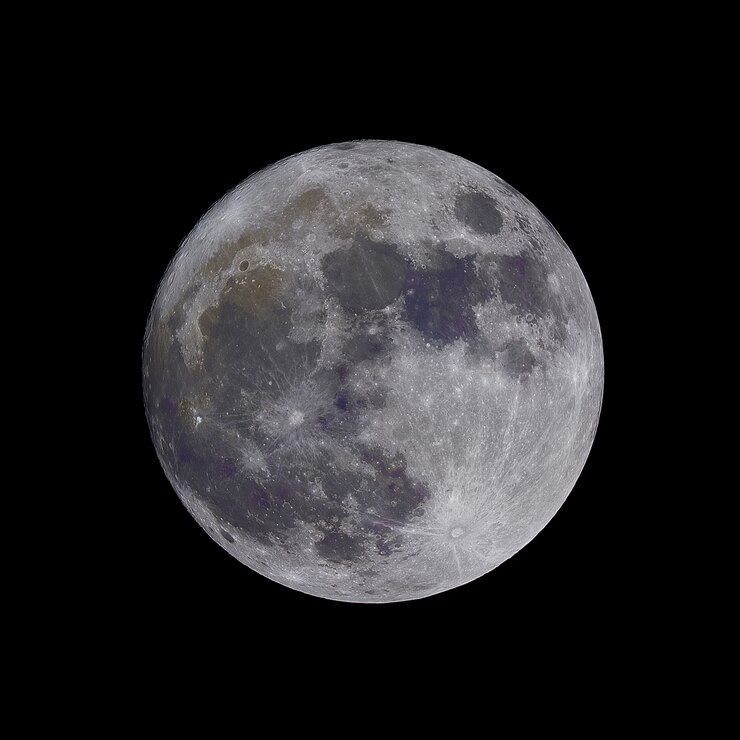

In [4]:
from google.colab.patches import cv2_imshow
import cv2

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    print(f"Original Image Shape: {image.shape}")
    print(f"Original Image Size: {image.size} pixels")
    cv2_imshow(image)


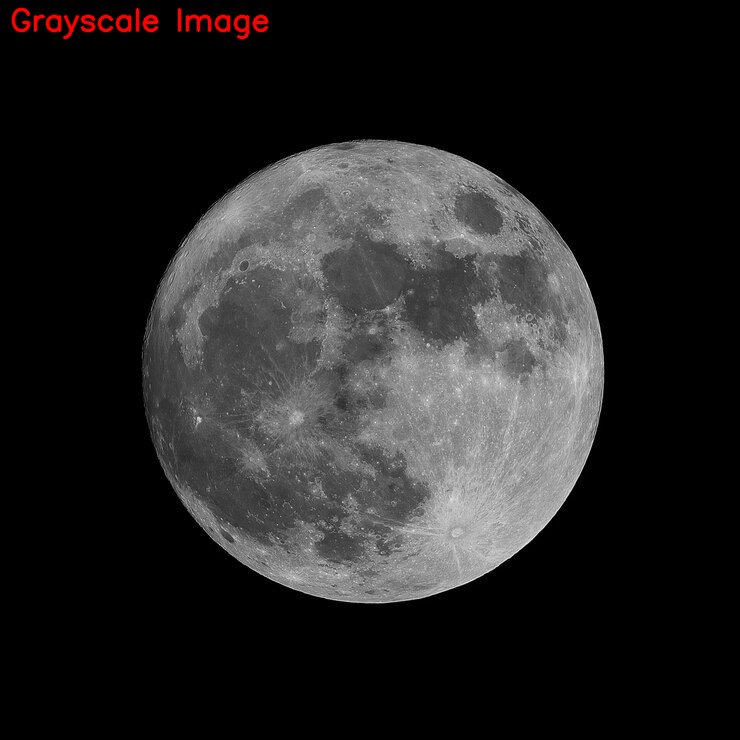

In [6]:
import cv2
from google.colab.patches import cv2_imshow

def add_label(image, label):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, label, (10, 30), font, 1, (0, 0, 255, 255), 2, cv2.LINE_AA)  # Red color
    return image

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
gray_image = add_label(gray_image, "Grayscale Image")

cv2.imwrite("grayscale.png", gray_image)
cv2_imshow(gray_image)


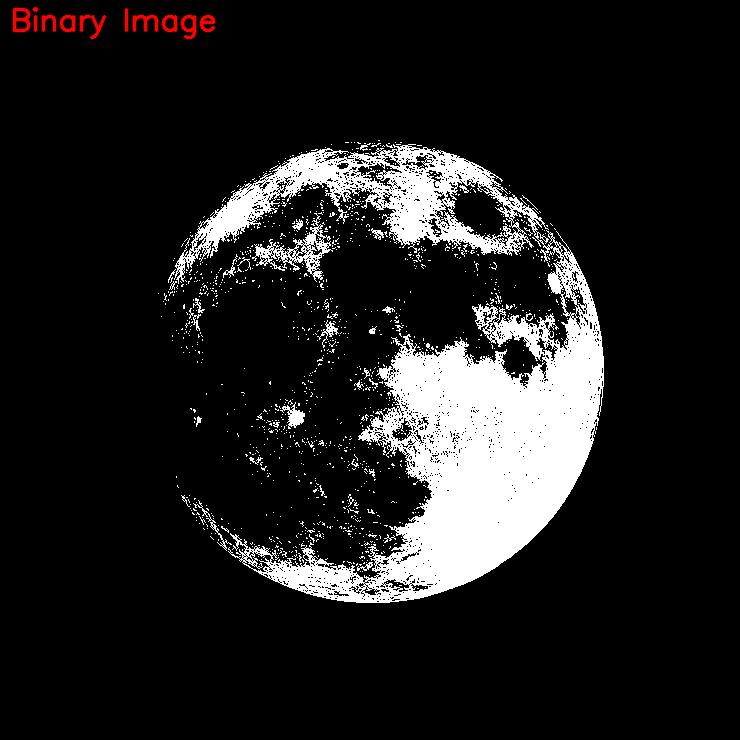

In [8]:
# Ensure gray_image is single-channel grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to binary
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Convert binary image to 3-channel format
binary_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

binary_image = add_label(binary_image, "Binary Image")

cv2.imwrite("binary.png", binary_image)
cv2_imshow(binary_image)


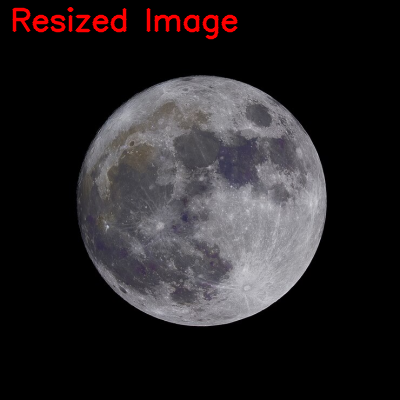

In [10]:
def resize_to_match(image, target_size=(400, 400)):
    return cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

resized_image = resize_to_match(image)
resized_image = add_label(resized_image, "Resized Image")

cv2.imwrite("resized.png", resized_image)
cv2_imshow(resized_image)


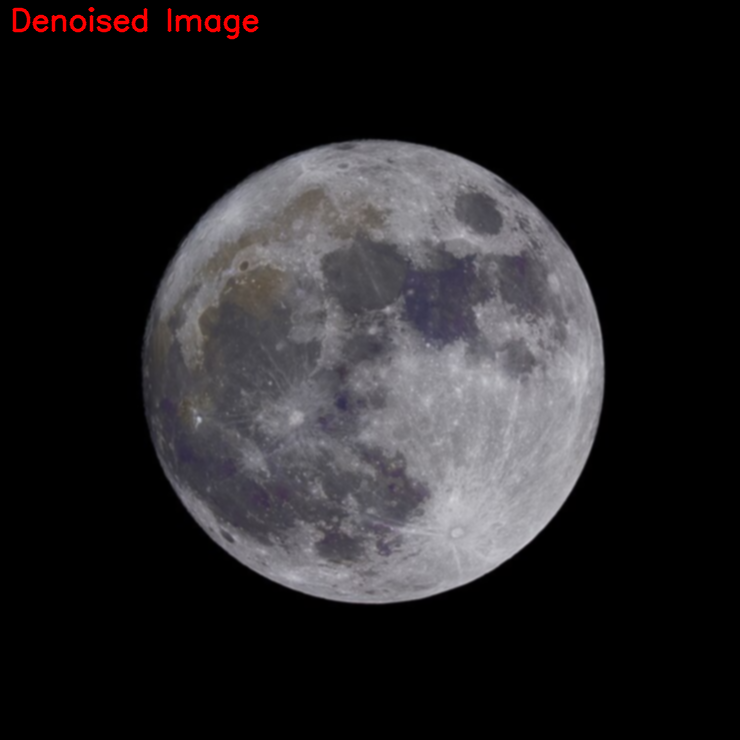

In [11]:
# Remove noise using Gaussian blur
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
denoised_image = add_label(denoised_image, "Denoised Image")
# Save and display
cv2.imwrite("denoised.png", denoised_image)
cv2_imshow(denoised_image)